# Data Carpentry Reproducible Research Workshop - Data Exploration

#### Authors: Brian Avery, Nima Hejazi, Kellie Ottoboni, Clara Sorensen, Niek Veldhuis

## Things You'll Need to Complete This Tutorial

This lesson uses packages that you've already downloaded along with the Anaconda distribution of Python.

### Download Data

In this lesson, you will use the Gapminder dataset. Please download the data from the web [here](https://raw.githubusercontent.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/gh-pages/data/gapminderDataFiveYear_superDirty.txt) and [here](https://raw.githubusercontent.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/gh-pages/data/PRB_data.txt) on GitHub.

## Overview

- Teaching: 40 min
- Exercises: 20 min

### Questions

- Why is the Jupyter notebook a useful tool for conducting and sharing data exploration?
- What is "tidy data"?
- What steps does one take to explore data?

### Objectives
Use the Python Pandas library in the Jupyter Notebook to:
* Assess the structure and cleanliness of a dataset, including the size and shape of the data, and the number of variables of each type.
* Describe findings, translate results from code to text using Markdown comments in the Jupyter Notebook, summarizing your thought process in a narrative.
* Modify raw data to prepare a clean data set -- including copying data, removing or replacing missing and incoherent data, dropping columns, removing duplicates.
* Assess whether data is “Tidy” and identify appropriate steps and write and  execute code to arrange it into a tidy format - including merging, reshaping, subsetting, grouping, sorting, and making appropriate new columns.
* Identify several relevant summary measures.
* Illustrate data in plots and determine the need for repeated or further analysis.
* Justify these decisions in Markdown in the Jupyter Notebook.

# Setting up the notebook

## About Libraries in Python

A library in Python contains a set of tools (called functions) that perform tasks on our data. Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench for use in a project. Once a library is imported, it can be used or called to perform many tasks.

Python doesn’t load all of the libraries available to it by default. We have to add an import statement to our code in order to use library functions. To import a library, we use the syntax `import libraryName`. If we want to give the library a nickname to shorten the command, we can add `as nickNameHere`. An example of importing the Pandas library using the common nickname `pd` is below.

**`import`** `pandas` **`as`** `pd`

## matplotlib and other plotting libraries

matplotlib is the most widely used Python library for plotting.  We can run it in the notebook using the magic command `%matplotlib inline`. If you do not use `%matplotlib inline`, your plots will be generated outside of the notebook and may be difficult to find.  See [the IPython docs](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for other IPython magics commands.

In this lesson, we will only use matplotlib and Seaborn, another package that works in tandem with matplotlib to make nice graphics.  There is a whole range of graphics packages in Python, ranging from basic visualizations to fancy, interactive graphics like [Bokeh](http://bokeh.pydata.org/en/latest/) and [Plotly](https://plot.ly/python/).  

We encourage you to explore on your own!  Chances are, if you can imagine a plot you'd like to make, somebody else has written a package to do it.

## Markdown
Text can be added to Jupyter Notebooks using Markdown cells. Markdown is a popular markup language that is a superset of HTML. To learn more, see [Jupyter's Markdown guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) or revisit the [Reproducible Research lesson on Markdown](https://github.com/Reproducible-Science-Curriculum/introduction-RR-Jupyter/blob/master/notebooks/Navigating%20the%20notebook%20-%20instructor%20script.ipynb). 



## The Pandas Library

One of the best options for working with tabular data in Python is the Python Data Analysis Library (a.k.a. Pandas). The Pandas library is built on top of the NumPy package (another Python library). Pandas provides data structures, produces high quality plots with matplotlib, and integrates nicely with other libraries that use NumPy arrays. Those familiar with spreadsheets should become comfortable with Pandas data structures.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Each time we call a function that’s in a library, we use the syntax `LibraryName.FunctionName`. Adding the library name with a `.` before the function name tells Python where to find the function. In the example above, we have imported Pandas as `pd`. This means we don’t have to type out `pandas` each time we call a Pandas function.

See this free [Pandas cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet) from DataCamp for the most common Pandas commands. 

# Getting data into the notebook

We will begin by locating and reading our data which are in a table format as a tab-delimited file. We will use Pandas’ `read_table` function to pull the file directly into a `DataFrame`.

## What’s a `DataFrame`?
A `DataFrame` is a 2-dimensional data structure that can store in columns data of different types (including characters, integers, floating point values, factors and more). It is similar to a spreadsheet or a SQL table or data.frame in R. A `DataFrame` always has an index (0-based). An index refers to the position of an element in the data structure.

Note that we use `pd.read_table`, not just `read_table` or `pandas.read_table`, because we imported Pandas as `pd`.

In our original file, the columns in the data set are separated by a TAB. We need to tell the `read_table` function in Pandas that that is the delimiter with `sep = ‘\t’`.



In [11]:
gapminder = pd.read_table("gapminderDataFiveYear_superDirty.txt", sep = "\t")

C:\Users\stephenkirchner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


The first thing to do when loading data into the notebook is to actually "look" at it.  How many rows and columns are there?  What types of variables are in it and what values can they take?

There are usually too many rows to print to the screen.  By default, when you type the name of the `DataFrame` and run a cell, Pandas knows to not print the whole thing.  Instead, you will see the first and last few rows with dots in between.  A neater way to see a preview of the dataset is the `head()` method.  Calling `dataset.head()` will display the first 5 rows of the data.  You can specify how many rows you want to see as an argument, like `dataset.head(10)`.  The `tail()` method does the same with the last rows of the `DataFrame`.

In [12]:
gapminder.head(10)

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan
5,1967.0,11537966.0,34.020,836.197138,Asia_Afghanistan
6,1972.0,13079460.0,36.088,739.981106,Asia_Afghanistan
7,1977.0,14880372.0,38.438,786.113360,Asia_Afghanistan
8,1982.0,12881816.0,39.854,978.011439,Asia_Afghanistan
9,1987.0,13867957.0,40.822,852.395945,Asia_Afghanistan


In [13]:
gapminder.tail(10)

,year,pop,life Exp,gdpPercap,region
1710,1962.0,4277736.0,52.358,527.272182,Africa_Zimbabwe
1711,1967.0,4995432.0,53.995,569.795071,Africa_Zimbabwe
1712,1972.0,5861135.0,55.635,799.362176,Africa_Zimbabwe
1713,1977.0,6642107.0,57.674,685.587682,Africa_Zimbabwe
1714,1982.0,7636524.0,60.363,788.855041,Africa_Zimbabwe
1715,1987.0,9216418.0,62.351,706.157306,Africa_Zimbabwe
1716,1992.0,10704340.0,60.377,693.420786,Africa_Zimbabwe
1717,1997.0,11404948.0,46.809,792.449960,Africa_Zimbabwe
1718,2002.0,11926563.0,39.989,672.038623,Africa_Zimbabwe
1719,2007.0,12311143.0,43.487,469.709298,Africa_Zimbabwe


In [14]:
gapminder

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan
5,1967.0,11537966.0,34.020,836.197138,Asia_Afghanistan
6,1972.0,13079460.0,36.088,739.981106,Asia_Afghanistan
7,1977.0,14880372.0,38.438,786.113360,Asia_Afghanistan
8,1982.0,12881816.0,39.854,978.011439,Asia_Afghanistan
9,1987.0,13867957.0,40.822,852.395945,Asia_Afghanistan


Sometimes the table has too many columns to print on screen. Calling `df.columns.values` will print all the column names in an array.

In [15]:
df.columns.values

NameError: name 'df' is not defined

# Assess the structure and cleanliness


## How many rows and columns are in the data?
We often want to know how many rows and columns are in the data -- what is the "shape" of the `DataFrame`. Shape is an attribute of the `DataFrame`. Pandas has a convenient way for getting that information by using `DataFrame.shape`  (using `DataFrame` here as a generic name for your `DataFrame`). This returns a tuple (immutable values separated by commas) representing the dimensions of the `DataFrame` (rows, columns).<p>
To get the shape of the gapminder `DataFrame`:

In [ ]:
gapminder.shape

We can learn even more about our `DataFrame`. The `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored.

The output from `info()` displayed below shows that the fields ‘year’ and ‘pop’ (population) are represented as ‘float’ (that is: numbers with a decimal point). This is not appropriate: year and population should be integers or whole numbers. We can change the data-type with the function `astype()`. The code for `astype()` is shown below; however, we will change the data types later in this lesson.

In [ ]:
gapminder.info()

The `describe()` method will take the numeric columns and provide a summary of their values. This is useful for getting a sense of the ranges of values and seeing if there are any unusual or suspicious numbers.


In [ ]:
gapminder.describe()

The `DataFrame` function `describe()` just blindly looks at all numeric variables. We wouldn't actually want to take the mean year. Additionally, we obtain ‘NaN’ values for our quartiles. This suggests we might have missing data which we can (and will) deal with shortly when we begin to clean our data.

For now, let's pull out only the columns that are truly continuous numbers (i.e. ignore the description for ‘year’). This is a preview of selecting columns from the data; we'll talk more about how to do it later in the lesson.

In [ ]:
gapminder[['pop', 'life Exp','gdpPercap']].describe()

We can also extract one specific variable metric at a time if we wish:

In [ ]:
print(gapminder[['gdpPercap', 'life Exp']].mean())

#### Values in columns

Next, let's say you want to see all the unique values for the `region` column. One way to do this is:

In [ ]:
pd.unique(gapminder.region)

This output is useful, but it looks like there may be some formatting issues causing the same region to be counted more than once. Let's take it a step further and find out to be sure. 

As mentioned previously, the command `value_counts()` gives you a first global idea of your categorical data such as strings. In this case that is the column `region`. Run the code below.

In [ ]:
print(len(gapminder.region.unique()))# How many unique regions are in the data?
# use len

gapminder.region.value_counts()# How many times does each unique region occur?
# region counts

The table reveals some problems in our data set. The data set covers 12 years, so each ‘region’ should appear 12 times, but some regions appear more than 12 times and others fewer than 12 times. We also see inconsistencies in the region names (string variables are very susceptible to those), for instance:

Asia_china	vs. Asia_China

Another type of problem we see is the various names of 'Congo'. In order to analyze this dataset appropriately we need to take care of these issues. We will fix them in the next section on data cleaning.

#### Exercises
Are there other columns in our `DataFrame` that have categorical variables? If so, run some code to list the categories below. Save your list to a variable and count the number of unique categories using `len`.

In [ ]:
print(len(gapminder.year.unique()))

What is the outcome when you run `value_counts()`?

In [ ]:
gapminder.year.value_counts()

# Data cleaning

## Referencing objects vs copying objects
Before we get started with cleaning our data, let's practice good data hygiene by first creating a copy of our original data set. Often, you want to leave the original data untouched.  To protect your original, you can make a copy of your data (and save it to a new `DataFrame` variable) before operating on the data or a subset of the data.  This will ensure that a new version of the original data is created and your original is preserved.

###### Why this is important
Suppose you take a subset of your `DataFrame` and store it in a new variable, like `gapminder_early = gapminder[gapminder['year'] < 1970]`.  Doing this does not actually create a new object. Instead, you have just given a name to that subset of the original data: `gapminder_early`. This subset still points to the original rows of `gapminder`.  Any changes you make to the new `DataFrame` `gapminder_early` will appear in the corresponding rows of your original `gapminder` `DataFrame` too.  


In [16]:
gapminder = pd.read_table("gapminderDataFiveYear_superDirty.txt", sep = "\t")
gapminder_copy = gapminder.copy()
gapminder_copy.head()

C:\Users\stephenkirchner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan


## Handling Missing Data

Missing data (often denoted as 'NaN'- not a number- in Pandas, or as 'null') is an important issue to handle because Pandas cannot compute on rows or columns with missing data. 'NaN' or 'null' does not mean the value at that position is zero, it means that there is no information at that position. Ignoring missing data doesn't make it go away. There are different ways of dealing with it which include:

* analyzing only the available data (i.e. ignore the missing data)
* input the missing data with replacement values and treating these as though they were observed
* input the missing data and account for the fact that these were inputed with uncertainty (ex: create a new boolean variable so you know that these values were not actually observed)
* use statistical models to allow for missing data--make assumptions about their relationships with the available data as necessary

For our purposes with the dirty gapminder data set, we know our missing data is excess (and unnecessary) and we are going to choose to analyze only the available data. To do this, we will simply remove rows with missing values.

This is incredibly easy to do because Pandas allows you to either remove all instances with null data or replace them with a particular value.

`df = df.dropna()` drops rows with any column having NA/null data.  `df = df.fillna(value)` replaces all NA/null data with the argument `value`.

For more fine-grained control of which rows (or columns) to drop, you can use `how` or `thresh`. These are more advanced topics and are not covered in this lesson; you are encouraged to explore them on your own.

In [17]:
gapminder_copy =gapminder_copy.dropna()
gapminder_copy

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
5,1967.0,11537966.0,34.020,836.197138,Asia_Afghanistan
6,1972.0,13079460.0,36.088,739.981106,Asia_Afghanistan
7,1977.0,14880372.0,38.438,786.113360,Asia_Afghanistan
8,1982.0,12881816.0,39.854,978.011439,Asia_Afghanistan
9,1987.0,13867957.0,40.822,852.395945,Asia_Afghanistan
10,1992.0,16317921.0,41.674,649.341395,Asia_Afghanistan


## Changing Data Types
We can change the data-type with the function `astype()`. The code for `astype()` is shown below.

In [18]:
gapminder_copy['year'] = gapminder_copy['year'].astype(int)
gapminder_copy['pop'] = gapminder_copy['pop'].astype(int)
gapminder_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 0 to 1719
Data columns (total 5 columns):
year         1712 non-null int32
pop          1712 non-null int32
life Exp     1712 non-null float64
gdpPercap    1712 non-null float64
region       1712 non-null object
dtypes: float64(2), int32(2), object(1)
memory usage: 66.9+ KB


## Handling (Unwanted) Repetitive Data
You can identify which observations are duplicates.
The call `df.duplicated()` will return boolean values for each row in the `DataFrame` telling you whether or not a row is repeated.

In cases where you don’t want repeated values (we wouldn’t--we only want each country to be represented once for every relevant year), you can easily drop such duplicate rows with the call `df.drop_duplicates()`.

In [19]:
gapminder_copy.drop_duplicates()
# duplicated() #shows we have a repetition within the first __ rows

,year,pop,life Exp,gdpPercap,region
0,1952,8425333,28.801,779.445314,Asia_Afghanistan
1,1957,9240934,30.332,820.853030,Asia_Afghanistan
3,1962,10267083,31.997,853.100710,Asia_Afghanistan
5,1967,11537966,34.020,836.197138,Asia_Afghanistan
6,1972,13079460,36.088,739.981106,Asia_Afghanistan
7,1977,14880372,38.438,786.113360,Asia_Afghanistan
8,1982,12881816,39.854,978.011439,Asia_Afghanistan
9,1987,13867957,40.822,852.395945,Asia_Afghanistan
10,1992,16317921,41.674,649.341395,Asia_Afghanistan
11,1997,22227415,41.763,635.341351,Asia_Afghanistan


Let's look at the first five rows of our data set again (remember we removed the NaNs):

In [20]:
# How do we look at the first 5 rows?

Our statement from above is correct, rows 1 & 2 are duplicated. Let's fix that:

In [21]:
gapminder_copy = gapminder_copy.drop_duplicates()

### Reindexing with `reset_index()`
Now we have 1704 rows, but our indexes are off because we removed duplicate rows. We can reset our indices easily with the call `reset_index(drop=True)`. Remember, Python is 0-indexed so our indices will be valued 0-1703.

The concept of reindexing is important. When we removed some of the messier, unwanted data, we had "gaps" in our index values. By correcting this, we can improve our search functionality and our ability to perform iterative functions on our cleaned data set.

In [22]:
gapminder_copy = gapminder_copy.reset_index(drop=True)
gapminder_copy

,year,pop,life Exp,gdpPercap,region
0,1952,8425333,28.801,779.445314,Asia_Afghanistan
1,1957,9240934,30.332,820.853030,Asia_Afghanistan
2,1962,10267083,31.997,853.100710,Asia_Afghanistan
3,1967,11537966,34.020,836.197138,Asia_Afghanistan
4,1972,13079460,36.088,739.981106,Asia_Afghanistan
5,1977,14880372,38.438,786.113360,Asia_Afghanistan
6,1982,12881816,39.854,978.011439,Asia_Afghanistan
7,1987,13867957,40.822,852.395945,Asia_Afghanistan
8,1992,16317921,41.674,649.341395,Asia_Afghanistan
9,1997,22227415,41.763,635.341351,Asia_Afghanistan



## Handling Inconsistent Data

The `region` column is a bit too messy for what we'd like to do.
The `value_counts()` operation above revealed some issues that we can solve with several different techniques.

### String manipulations

Common problems with string variables are leading and trailing white space and upper case vs. lower case in the same data set.

The following three commands remove all such lingering spaces (left and right) and put everything in lowercase. If you prefer, the three commands can be written in one single line (which is a concept called chaining). 

In [23]:
gapminder_copy['region'] = gapminder_copy['region'].str.lstrip() # Strip white space on left
gapminder_copy['region'] = gapminder_copy['region'].str.rstrip() # Strip white space on right
gapminder_copy['region'] = gapminder_copy['region'].str.lower() # Convert to lowercase
gapminder_copy['region'].value_counts() # How many times does each unique region occur?

# We could have done this in one line!
# gapminder_copy['region'] = gapminder_copy['region'].str.lstrip().str.rstrip().lower()

asia_saudi arabia                          12
europe_greece                              12
africa_mozambique                          12
africa_burundi                             12
africa_malawi                              12
americas_argentina                         12
asia_lebanon                               12
europe_portugal                            12
americas_united states                     12
europe_france                              12
africa_djibouti                            12
africa_sierra leone                        12
oceania_australia                          12
africa_morocco                             12
europe_switzerland                         12
africa_guinea-bissau                       12
oceania_new zealand                        12
asia_bangladesh                            12
europe_ireland                             12
americas_chile                             12
asia_singapore                             12
europe_hungary                    

### regex + `replace()`

A regular expression, a.k.a. regex, is a sequence of characters that define a search pattern. In a regular expression, the symbol “*” matches the preceding character 0 or more times, whereas “+” matches the preceding character 1 or more times. “.” matches any single character. Writing “x|y” means to match either ‘x’ or ‘y’.

For more regex shortcuts (cheatsheet): https://www.shortcutfoo.com/app/dojos/regex/cheatsheet

To play "regex golf," check out this [tutorial by Peter Norvig](https://www.oreilly.com/learning/regex-golf-with-peter-norvig) (you may need an O'Reilly or social media account to play).

Pandas allows you to use `regex` in its `replace()` function -- when a regex term is found in an element, the element is then replaced with the specified replacement term. In order for it to appropriately correct elements, both regex and inplace variables need to be set to `True` (as their defaults are False). This ensures that the initial input string is read as a regular expression and that the elements will be modified in place.

For more documentation on the replace method: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

Here's an incorrect regex example: we create a temporary `DataFrame` in which a regex pulls all values that contain the term “congo”. Unfortunately, this creates 24 instances of the Democratic Republic of the Congo -- this is an error in our cleaning! We can revert back to the non-temporary `DataFrame` and correctly modify our regex to isolate only the Democratic Republic instances (as opposed to including the Republic as well).

In [24]:
# This gives a problem -- 24 values of the congo!
temp = gapminder_copy['region'].replace(".*congo.*", "africa_dem rep congo", regex=True)
temp.value_counts()

africa_dem rep congo               24
asia_saudi arabia                  12
asia_bangladesh                    12
africa_burundi                     12
africa_malawi                      12
americas_argentina                 12
asia_lebanon                       12
europe_portugal                    12
americas_united states             12
europe_france                      12
africa_djibouti                    12
africa_sierra leone                12
oceania_australia                  12
africa_morocco                     12
europe_switzerland                 12
africa_guinea-bissau               12
oceania_new zealand                12
africa_mozambique                  12
europe_ireland                     12
europe_belgium                     12
americas_chile                     12
africa_central african republic    12
americas_cuba                      12
europe_norway                      12
africa_zambia                      12
africa_sudan                       12
asia_west ba

In [25]:
# What happened? This shows all the rows that have congo in the name.
gapminder_copy[gapminder_copy["region"].str.contains('congo')]

,year,pop,life Exp,gdpPercap,region
324,1952,14100005,39.143,780.542326,"africa_congo, dem. rep."
325,1957,15577932,40.652,905.860230,"africa_congo, dem. rep."
326,1962,17486434,42.122,896.314634,"africa_congo, dem. rep."
327,1967,19941073,44.056,861.593242,"africa_congo, dem. rep."
328,1972,23007669,45.989,904.896069,africa_democratic republic of the congo
329,1977,26480870,47.804,795.757282,"africa_congo, dem. rep."
330,1982,30646495,47.784,673.747818,"africa_congo, dem. rep."
331,1987,35481645,47.412,672.774812,"africa_congo, dem. rep."
332,1992,41672143,45.548,457.719181,"africa_congo, dem. rep."
333,1997,47798986,42.587,312.188423,"africa_congo, democratic republic"


### Using regex to correctly consolidate the Congo regions...

As noted above, regular expressions (often simply "regex") provide a powerful 
tool for fixing errors that arise in strings. In order to correctly label the 
two different countries that include the word "congo", we need to design and
use (via `pd.df.replace()`) a regex that correctly differentiates between the
two countries.

Recall that the "." is the wildcard (matching any single character); combining 
this with "*" allows us to match any number of single characters an unspecified 
number of times. By combining these characters with substrings corresponding to
variations in the naming of the Democratic Republic of the Congo, we can
correctly normalize the name.

If you feel that the use of regex is not particularly straightforward, you are
correct -- appropriately using these tools takes a great deal of time to master.
When designing regex for these sorts of tasks, you might find the following
prototyper helpful: https://regex101.com/  

In [26]:
gapminder_copy['region'].replace(".*congo, dem.*", "africa_dem rep congo", regex=True, inplace=True)
gapminder_copy['region'].replace(".*_democratic republic of the congo", "africa_dem rep congo", regex=True, inplace=True)
gapminder_copy['region'].value_counts() # Now it's fixed.

asia_saudi arabia                12
africa_djibouti                  12
africa_malawi                    12
americas_argentina               12
asia_lebanon                     12
europe_portugal                  12
americas_united states           12
europe_france                    12
africa_sierra leone              12
africa_mozambique                12
oceania_australia                12
africa_morocco                   12
europe_switzerland               12
africa_guinea-bissau             12
oceania_new zealand              12
europe_bosnia and herzegovina    12
africa_burundi                   12
asia_bangladesh                  12
africa_benin                     12
asia_west bank and gaza          12
americas_el salvador             12
asia_taiwan                      12
africa_rwanda                    12
americas_brazil                  12
asia_singapore                   12
asia_india                       12
africa_sudan                     12
europe_ireland              

### Exercise (regex):

Now that we've taken a close look at how to properly design and use regex to
clean string entries in our data, let's try to normalize the naming of a few
other countries. Using the pandas code we constructed above as a template,
construct similar code (using `pd.df.replace()`) to set the naming of the Ivory
Coast and Canada to "africa_cote d'ivoire" and "americas_canada", respectively.

In [27]:
gapminder_copy['region'].replace(".*_canada*", "americas.canada", regex=True, inplace=True)
gapminder_copy['region'].replace(".*africa_cote d'ivore", "africa_cote d'ivoire", regex=True, inplace=True)
gapminder_copy['region'].value_counts() # Now it's fixed.

asia_saudi arabia                12
africa_djibouti                  12
asia_lebanon                     12
americas_argentina               12
americas.canada                  12
europe_portugal                  12
americas_united states           12
europe_france                    12
africa_sierra leone              12
africa_mozambique                12
oceania_australia                12
africa_morocco                   12
europe_switzerland               12
africa_guinea-bissau             12
oceania_new zealand              12
europe_bosnia and herzegovina    12
africa_burundi                   12
asia_bangladesh                  12
africa_benin                     12
asia_india                       12
americas_el salvador             12
asia_taiwan                      12
africa_rwanda                    12
americas_brazil                  12
asia_singapore                   12
asia_vietnam                     12
africa_sudan                     12
europe_ireland              

## Tidy data

Having what is called a "_Tidy_ data set" can make cleaning, analyzing, and visualizing your data much easier. You should aim for having Tidy data when cleaning and preparing your data set for analysis. Two of the important aspects of Tidy data are:
* every variable has its own column
* every observation has its own row

(There are other aspects of Tidy data, here is a good blog post about Tidy data in Python: http://www.jeannicholashould.com/tidy-data-in-python.html)

Currently the gapminder dataset has a single column for continent and country (the ‘region’ column). We can split that column into two, by using the underscore that separates continent from country.
We can create a new column in the `DataFrame` by naming it before the = sign:
`gapminder['country'] = `

The following commands use the function `split()` to split the string at the underscore (the first argument), which results in a list of two elements: before and after the \_. The second argument tells `split()` that the split should take place only at the first occurrence of the underscore.

In [28]:
gapminder_copy['country']=gapminder_copy['region'].str.split('_', 1).str[1]
gapminder_copy['continent']=gapminder_copy['region'].str.split('_', 1).str[0]
gapminder_copy.head()

,year,pop,life Exp,gdpPercap,region,country,continent
0,1952,8425333,28.801,779.445314,asia_afghanistan,afghanistan,asia
1,1957,9240934,30.332,820.853030,asia_afghanistan,afghanistan,asia
2,1962,10267083,31.997,853.100710,asia_afghanistan,afghanistan,asia
3,1967,11537966,34.020,836.197138,asia_afghanistan,afghanistan,asia
4,1972,13079460,36.088,739.981106,asia_afghanistan,afghanistan,asia


### Removing and renaming columns

We have now added the columns `country` and `continent`, but we still have the old `region` column as well. In order to remove that column we use the `drop()` command. The first argument of the `drop()` command is the name of the element to be dropped. The second argument is the *axis* number:  
*0 for row, 1 for column*.

In [29]:
gapminder_copy

,year,pop,life Exp,gdpPercap,region,country,continent
0,1952,8425333,28.801,779.445314,asia_afghanistan,afghanistan,asia
1,1957,9240934,30.332,820.853030,asia_afghanistan,afghanistan,asia
2,1962,10267083,31.997,853.100710,asia_afghanistan,afghanistan,asia
3,1967,11537966,34.020,836.197138,asia_afghanistan,afghanistan,asia
4,1972,13079460,36.088,739.981106,asia_afghanistan,afghanistan,asia
5,1977,14880372,38.438,786.113360,asia_afghanistan,afghanistan,asia
6,1982,12881816,39.854,978.011439,asia_afghanistan,afghanistan,asia
7,1987,13867957,40.822,852.395945,asia_afghanistan,afghanistan,asia
8,1992,16317921,41.674,649.341395,asia_afghanistan,afghanistan,asia
9,1997,22227415,41.763,635.341351,asia_afghanistan,afghanistan,asia


Finally, it is a good idea to look critically at your column names. Use lowercase for all column names to avoid confusing `gdppercap` with `gdpPercap` or `GDPpercap`. Avoid spaces in column names to simplify manipulating your data - look out for lingering white space at the beginning or end of your column names. The following code turns all column names to lowercase. 


In [30]:
gapminder_copy.columns = gapminder_copy.columns.str.lower()
gapminder_copy

,year,pop,life exp,gdppercap,region,country,continent
0,1952,8425333,28.801,779.445314,asia_afghanistan,afghanistan,asia
1,1957,9240934,30.332,820.853030,asia_afghanistan,afghanistan,asia
2,1962,10267083,31.997,853.100710,asia_afghanistan,afghanistan,asia
3,1967,11537966,34.020,836.197138,asia_afghanistan,afghanistan,asia
4,1972,13079460,36.088,739.981106,asia_afghanistan,afghanistan,asia
5,1977,14880372,38.438,786.113360,asia_afghanistan,afghanistan,asia
6,1982,12881816,39.854,978.011439,asia_afghanistan,afghanistan,asia
7,1987,13867957,40.822,852.395945,asia_afghanistan,afghanistan,asia
8,1992,16317921,41.674,649.341395,asia_afghanistan,afghanistan,asia
9,1997,22227415,41.763,635.341351,asia_afghanistan,afghanistan,asia


We also want to remove the space from the `life exp` column name. We can do that with Pandas `rename` method. It takes a dictionary as its argument, with the old column names as keys and new column names as values.

If you're unfamiliar with dictionaries, they are a very useful data structure in Python.  You can read more about them [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [31]:
gapminder_copy= gapminder_copy.rename(columns={'life exp': 'lifeexp'})
gapminder_copy

,year,pop,lifeexp,gdppercap,region,country,continent
0,1952,8425333,28.801,779.445314,asia_afghanistan,afghanistan,asia
1,1957,9240934,30.332,820.853030,asia_afghanistan,afghanistan,asia
2,1962,10267083,31.997,853.100710,asia_afghanistan,afghanistan,asia
3,1967,11537966,34.020,836.197138,asia_afghanistan,afghanistan,asia
4,1972,13079460,36.088,739.981106,asia_afghanistan,afghanistan,asia
5,1977,14880372,38.438,786.113360,asia_afghanistan,afghanistan,asia
6,1982,12881816,39.854,978.011439,asia_afghanistan,afghanistan,asia
7,1987,13867957,40.822,852.395945,asia_afghanistan,afghanistan,asia
8,1992,16317921,41.674,649.341395,asia_afghanistan,afghanistan,asia
9,1997,22227415,41.763,635.341351,asia_afghanistan,afghanistan,asia


## Merging data

Often we have more than one `DataFrame` that contains parts of our data set and we want to put them together. This is known as merging the data.

Our advisor now wants us to add a new country called The People's Republic of Berkeley to the gapminder data set that we have cleaned up. Our goal is to get this new data into the same `DataFrame` in the same format as the gapminder data and, in this case, we want to concatenate (add) it onto the end of the gapminder data.

Concatentating is a simple form of merging, there are many useful (and more complicated) ways to merge data.  If you are interested in more information, the [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html) is useful.

In [32]:
PRB = pd.read_table("PRB_data.txt", sep = "\t")
PRB.head()

C:\Users\stephenkirchner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,year,pop,lifeExp,gdpPercap,region
0,1952,113805,66.75,779.6780,Americas_Peoples Republic of Berkeley
1,1957,114077,67.96,821.2960,Americas_Peoples Republic of Berkeley
2,1962,111268,71.11,857.2354,Americas_Peoples Republic of Berkeley
3,1967,114785,72.03,838.1382,Americas_Peoples Republic of Berkeley
4,1972,116716,72.67,737.1058,Americas_Peoples Republic of Berkeley


In [33]:
PRB['country'] = PRB['region'].str.split('_',1).str[1].str.lower()
PRB['continent'] =PRB['region'].str.split('_',1).str[0].str.lower()
PRB =PRB.drop('region',1)
PRB.columns = PRB.columns.str.lower()
PRB
## bring in PRB data (no major problems) and make it conform to the gapminder at this point
# clean the data to look like the current gapminder


,year,pop,lifeexp,gdppercap,country,continent
0,1952,113805,66.75,779.6780,peoples republic of berkeley,americas
1,1957,114077,67.96,821.2960,peoples republic of berkeley,americas
2,1962,111268,71.11,857.2354,peoples republic of berkeley,americas
3,1967,114785,72.03,838.1382,peoples republic of berkeley,americas
4,1972,116716,72.67,737.1058,peoples republic of berkeley,americas
5,1977,116370,73.71,785.1336,peoples republic of berkeley,americas
6,1982,104429,74.56,980.0388,peoples republic of berkeley,americas
7,1987,102351,75.96,851.9448,peoples republic of berkeley,americas
8,1992,103328,76.95,649.3952,peoples republic of berkeley,americas
9,1997,102724,78.91,636.3435,peoples republic of berkeley,americas


In [34]:
# double check that the gapminder is the same
gapminder_copy


,year,pop,lifeexp,gdppercap,region,country,continent
0,1952,8425333,28.801,779.445314,asia_afghanistan,afghanistan,asia
1,1957,9240934,30.332,820.853030,asia_afghanistan,afghanistan,asia
2,1962,10267083,31.997,853.100710,asia_afghanistan,afghanistan,asia
3,1967,11537966,34.020,836.197138,asia_afghanistan,afghanistan,asia
4,1972,13079460,36.088,739.981106,asia_afghanistan,afghanistan,asia
5,1977,14880372,38.438,786.113360,asia_afghanistan,afghanistan,asia
6,1982,12881816,39.854,978.011439,asia_afghanistan,afghanistan,asia
7,1987,13867957,40.822,852.395945,asia_afghanistan,afghanistan,asia
8,1992,16317921,41.674,649.341395,asia_afghanistan,afghanistan,asia
9,1997,22227415,41.763,635.341351,asia_afghanistan,afghanistan,asia


In [35]:
# combine the data sets with concat
gapminder_comb = pd.concat([gapminder_copy, PRB])

C:\Users\stephenkirchner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Now that the `DataFrames` have been concatenated, notice that the index is funky. It repeats the numbers 0 - 11 in the `peoples republic of berkeley data`. <p>
#### **Exercise:** fix the index.


In [36]:
gapminder_comb = gapminder_comb.reset_index(drop = True) # our code for fixing index
gapminder_comb

,continent,country,gdppercap,lifeexp,pop,region,year
0,asia,afghanistan,779.445314,28.801,8425333,asia_afghanistan,1952
1,asia,afghanistan,820.853030,30.332,9240934,asia_afghanistan,1957
2,asia,afghanistan,853.100710,31.997,10267083,asia_afghanistan,1962
3,asia,afghanistan,836.197138,34.020,11537966,asia_afghanistan,1967
4,asia,afghanistan,739.981106,36.088,13079460,asia_afghanistan,1972
5,asia,afghanistan,786.113360,38.438,14880372,asia_afghanistan,1977
6,asia,afghanistan,978.011439,39.854,12881816,asia_afghanistan,1982
7,asia,afghanistan,852.395945,40.822,13867957,asia_afghanistan,1987
8,asia,afghanistan,649.341395,41.674,16317921,asia_afghanistan,1992
9,asia,afghanistan,635.341351,41.763,22227415,asia_afghanistan,1997


## Subsetting and sorting

There are many ways in which you can manipulate a Pandas `DataFrame` - here we will discuss two approaches: subsetting and sorting.

##### Subsetting
We can subset (or slice) by giving the numbers of the rows you want to see between square brackets.

*REMINDER:* Python uses 0-based indexing. This means that the first element in an object is located at position 0. this is different from other tools like R and Matlab that index elements within objects starting at 1.

In [37]:
gapminder_comb[0:15]

,continent,country,gdppercap,lifeexp,pop,region,year
0,asia,afghanistan,779.445314,28.801,8425333,asia_afghanistan,1952
1,asia,afghanistan,820.853030,30.332,9240934,asia_afghanistan,1957
2,asia,afghanistan,853.100710,31.997,10267083,asia_afghanistan,1962
3,asia,afghanistan,836.197138,34.020,11537966,asia_afghanistan,1967
4,asia,afghanistan,739.981106,36.088,13079460,asia_afghanistan,1972
5,asia,afghanistan,786.113360,38.438,14880372,asia_afghanistan,1977
6,asia,afghanistan,978.011439,39.854,12881816,asia_afghanistan,1982
7,asia,afghanistan,852.395945,40.822,13867957,asia_afghanistan,1987
8,asia,afghanistan,649.341395,41.674,16317921,asia_afghanistan,1992
9,asia,afghanistan,635.341351,41.763,22227415,asia_afghanistan,1997


In [38]:
# Use a different way to select the first 15 rows


In [39]:
gapminder_comb[-10:]


,continent,country,gdppercap,lifeexp,pop,region,year
1706,americas,peoples republic of berkeley,857.2354,71.11,111268,NaN,1962
1707,americas,peoples republic of berkeley,838.1382,72.03,114785,NaN,1967
1708,americas,peoples republic of berkeley,737.1058,72.67,116716,NaN,1972
1709,americas,peoples republic of berkeley,785.1336,73.71,116370,NaN,1977
1710,americas,peoples republic of berkeley,980.0388,74.56,104429,NaN,1982
1711,americas,peoples republic of berkeley,851.9448,75.96,102351,NaN,1987
1712,americas,peoples republic of berkeley,649.3952,76.95,103328,NaN,1992
1713,americas,peoples republic of berkeley,636.3435,78.91,102724,NaN,1997
1714,americas,peoples republic of berkeley,726.7340,79.07,102743,NaN,2002
1715,americas,peoples republic of berkeley,979.3384,80.03,112580,NaN,2007


### Exercise

*What does the negative number (in the third cell) mean?*

Answer:

*What happens when you leave the space before or after the colon empty?*

Answer:

Subsetting can also be done by selecting for a particular column or for a particular value in a column; for instance select the rows that have ‘africa’ in the column ‘continent. Note the double equal sign: single equal signs are used in Python to assign something to a variable. The double equal sign is a comparison: the variable to the left has to be exactly equal to the string to the right.

**There other ways of subsetting that are worth knowing about. Do an independent reading of using .loc/.iloc with `DataFrames`**

In [40]:
gapminder_comb['year']
#Select for a particular column
gapminder_comb[gapminder_comb['continent']== 'africa']

#this syntax, calling the column as an attribute, gives you the same output


,continent,country,gdppercap,lifeexp,pop,region,year
24,africa,algeria,2449.008185,43.077,9279525,africa_algeria,1952
25,africa,algeria,3013.976023,45.685,10270856,africa_algeria,1957
26,africa,algeria,2550.816880,48.303,11000948,africa_algeria,1962
27,africa,algeria,3246.991771,51.407,12760499,africa_algeria,1967
28,africa,algeria,4182.663766,54.518,14760787,africa_algeria,1972
29,africa,algeria,4910.416756,58.014,17152804,africa_algeria,1977
30,africa,algeria,5745.160213,61.368,20033753,africa_algeria,1982
31,africa,algeria,5681.358539,65.799,23254956,africa_algeria,1987
32,africa,algeria,5023.216647,67.744,26298373,africa_algeria,1992
33,africa,algeria,4797.295051,69.152,29072015,africa_algeria,1997


We can also create a new object that contains the data within the `continent` column

#### Sorting
Sorting may help to further organize and inspect your data. The command `sort_values()` takes a number of arguments; the most important ones are `by` and `ascending.` The following command will sort your `DataFrame` by year, beginning with the most recent.

In [41]:
gapminder_comb.sort_values(by='year', ascending =False)

,continent,country,gdppercap,lifeexp,pop,region,year
1715,americas,peoples republic of berkeley,979.338400,80.030,112580,NaN,2007
455,americas,ecuador,6873.262326,74.994,13755680,americas_ecuador,2007
1367,asia,singapore,47143.179640,79.972,4553009,asia_singapore,2007
1355,africa,sierra leone,862.540756,42.568,6144562,africa_sierra leone,2007
311,americas,colombia,7006.580419,72.889,44227550,americas_colombia,2007
1343,europe,serbia,9786.534714,74.002,10150265,europe_serbia,2007
323,africa,comoros,986.147879,65.152,710960,africa_comoros,2007
1331,africa,senegal,1712.472136,63.062,12267493,africa_senegal,2007
335,africa,dem rep congo,277.551859,46.462,64606759,africa_dem rep congo,2007
1319,asia,saudi arabia,21654.831940,72.777,27601038,asia_saudi arabia,2007


### Exercise

Organize your data set by country, from ‘Afganistan’ to ‘Zimbabwe’.

## Summarize and plot

Summaries (but can’t *say* statistics…)
* Sort data
* Basic summaries


Plots 
* of subsets 
* single variables
* pairs of variables
* Matplotlib syntax (w/ Seaborn for defaults (prettier, package also good for more analysis later...))

Exploring is often iterative - summarize, plot, summarize, plot, etc. - sometimes it branches…


# Summarizing data

Remember that the `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored. We can see many of our changes (continent and country columns instead of region, higher number of rows, etc.) reflected in the output of the `info()` method.

In [42]:
gapminder_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 7 columns):
continent    1716 non-null object
country      1704 non-null object
gdppercap    1716 non-null float64
lifeexp      1716 non-null float64
pop          1716 non-null int64
region       1704 non-null object
year         1716 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 93.9+ KB


We also saw above that the `describe()` method will take the numeric columns and give a summary of their values. We have to remember that we changed the column names and this time it shouldn't have NaNs.

In [43]:
gapminder_comb[['pop', 'lifeexp', 'gdppercap']].describe()

,pop,lifeexp,gdppercap
count,1.716000e+03,1716.000000,1716.000000
mean,2.939498e+07,59.577013,7170.489352
std,1.058144e+08,12.934328,9837.440250
min,6.001100e+04,23.599000,241.165877
25%,2.735858e+06,48.275750,1177.869539
50%,6.985493e+06,60.873500,3484.113173
75%,1.929230e+07,70.961000,9279.348034
max,1.318683e+09,82.603000,113523.132900


### More summaries

What if we just want a single value, like the mean of the population? We can call mean on a single column this way:


In [45]:
gapminder_comb['pop'].mean()

29394977.25932401

What if we want to know the mean population by _continent_? Then we need to use the Pandas `groupby()` method and tell it which column we want to group by.


In [46]:
gapminder_comb[['continent', 'pop']].groupby(by='continent').mean()

,pop
continent,
africa,9.916003e+06
americas,2.353066e+07
americas.canada,2.446297e+07
asia,7.703872e+07
europe,1.716976e+07
oceania,8.874672e+06


What if we want to know the median population by continent?


In [47]:
gapminder_comb[['continent', 'pop']].groupby(by='continent').median()

,pop
continent,
africa,4579311.0
americas,5367612.0
americas.canada,24499150.0
asia,14530830.5
europe,8551125.0
oceania,6403491.5


Or the number of entries (rows) per continent?


In [48]:
gapminder_comb[['continent', 'pop']].groupby(by='continent').count()

,pop
continent,
africa,624
americas,300
americas.canada,12
asia,396
europe,360
oceania,24


Sometimes we don't want a whole `DataFrame`. Here is another way to do this that produces a `Series` that tells us number of entries (rows) as opposed to a `DataFrame`. 


In [50]:
gdpcap= gapminder_comb[['continent', 'country']].groupby(by='continent').size()
gdpcap

continent
africa             624
americas           300
americas.canada     12
asia               396
europe             360
oceania             24
dtype: int64

We can also look at the mean GDP per capita of each country: 


In [52]:
gapminder_comb[['country', 'gdppercap']].groupby(by='country').mean().head(12)

,gdppercap
country,
afghanistan,802.674598
albania,3255.366633
algeria,4426.025973
angola,3607.100529
argentina,8955.553783
australia,19980.595634
austria,20411.916279
bahrain,18077.663945
bangladesh,817.558818


What if we wanted a new `DataFrame` that just contained these summaries? This could be a table in a report, for example.

In [53]:
continent_mean_pop = gapminder_comb[['continent', 'pop']].groupby(by='continent').mean()
continent_mean_pop = continent_mean_pop.rename(columns = {'pop':'meanpop'})
continent_row_ct = gapminder_comb[['continent', 'country']].groupby(by='continent').count()
continent_row_ct = continent_row_ct.rename(columns = {'country':'nrows'})
continent_median_pop = gapminder_comb[['continent', 'pop']].groupby(by='continent').median()
continent_median_pop = continent_median_pop.rename(columns = {'pop':'medianpop'})
gapminder_summs = pd.concat([continent_row_ct,continent_mean_pop,continent_median_pop], axis=1)
gapminder_summs = gapminder_summs.rename(columns = {'y':'year'})
gapminder_summs

,nrows,meanpop,medianpop
continent,,,
africa,624,9.916003e+06,4579311.0
americas,300,2.353066e+07,5367612.0
americas.canada,0,2.446297e+07,24499150.0
asia,396,7.703872e+07,14530830.5
europe,360,1.716976e+07,8551125.0
oceania,24,8.874672e+06,6403491.5


## Visualization with `matplotlib`

Recall that [matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries like so:

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

*Consider the above three commands to be essential practice for plotting (as
essential as **`import`** `pandas` **`as`** `pd` is for data munging).*

Now, let's turn to data visualization. In order to get a feel for the properties
of the data set we are working with, data visualization is key. While, we will
focus only on the essentials of how to properly construct plots in univariate
and bivariate settings here, it's worth noting that both matplotlib and Seaborn
support a diversity of plots: [matplotlib 
gallery](http://matplotlib.org/gallery.html), [Seaborn
gallery](http://seaborn.pydata.org/examples/). 


---

### Single variables

* __Histograms__ - provide a quick way of visualizing the distribution of numerical
  data, or the frequencies of observations for categorical variables.

Text(0, 0.5, 'count')

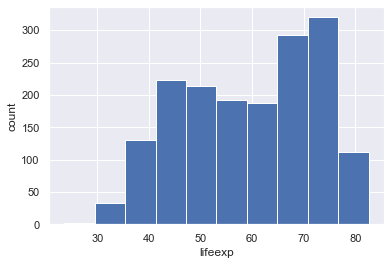

In [55]:
#import numpy as np
plt.hist(gapminder_copy['lifeexp'])
plt.xlabel('lifeexp')
plt.ylabel('count')

* __Boxplots__ - provide a way of comparing the summary measures (e.g., max, min,
  quartiles) across variables in a data set. Boxplots can be particularly useful with larger data sets.

---

Text(0, 0.5, 'lifeexp')

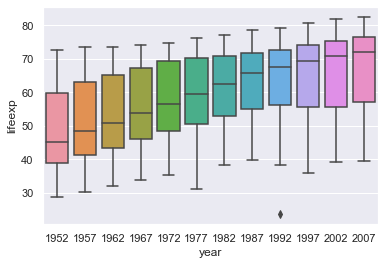

In [56]:
sns.boxplot(x='year', y='lifeexp', data=gapminder_copy)
plt.xlabel('year')
plt.ylabel('lifeexp')

### Pairs of variables

* __Scatterplots__ - visualization of relationships across two variables...

Text(0, 0.5, 'lifeexp')

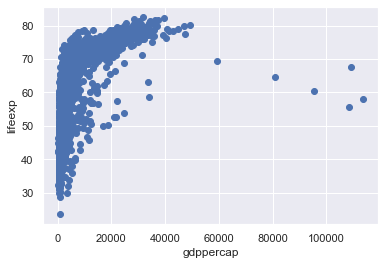

In [57]:
# scatter plot goes here

plt.scatter(gapminder_copy['gdppercap'], gapminder_copy['lifeexp'])
plt.xlabel('gdppercap')
plt.ylabel('lifeexp')

Text(0, 0.5, 'lifeexp')

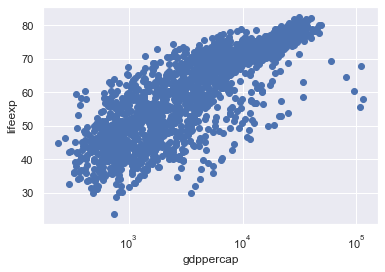

In [58]:
# let's try plotting the log of x
plt.scatter(gapminder_copy['gdppercap'], gapminder_copy['lifeexp'])
plt.xscale('log')
plt.xlabel('gdppercap')
plt.ylabel('lifeexp')

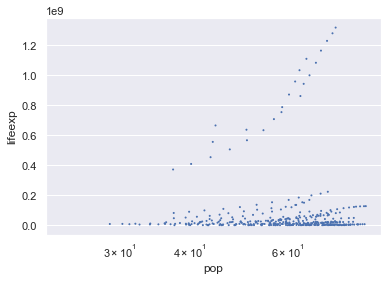

In [67]:
plt.scatter(gapminder_copy['lifeexp'], gapminder_copy['pop'], [gapminder_copy['continent'] == 'asia'])
plt.xlabel('pop')
plt.ylabel('lifeexp')
plt.xscale('log')


---

### Why use `seaborn`?

As noted above, Seaborn is a high-level plotting library for statistical data 
visualization. In addition to simplifying plotting, it also provides facilities 
for customizing matplotlib plots (accessible via `sns.set()`).

### Saving your plots as image files  
If you'd like to save your plots as an image file, you can run `fig.savefig('my_figure.png')` where `"my_figure"` is the file name.    

## Interpret plots and summaries

### Exploration is an iterative process

In this lesson, we've taken the raw data and worked through steps to prepare it for analysis, but we have not yet done any "data analysis".  This part of the data workflow can be thought of as "exploratory data analysis", or EDA.  Many of the steps we've shown are aimed at uncovering interesting or problematic things in the dataset that are not immediately obvious.  We want to stress that when you're doing EDA, it will not necessarily be a linear workflow like what we have shown.  When you plot or summarize your data, you may uncover new issues: for example, we saw this when we made a mistake fixing the naming conventions for the Democratic Republic of Congo.  You might discover outliers, unusually large values, or points that don't make sense in your plots.  Clearly, the work here isn't done: you'll have to investigate these points, decide how to fix any potential problems, document the reasoning for your actions, and check that your fix actually worked.

On the other hand, plots and summaries might reveal interesting questions about your data.  You may return to the cleaning and prepping steps in order to dig deeper into these questions.  You should continuously refine your plots to give the clearest picture of your hypotheses.

### Interesting findings

What's interesting about this data set? What would you like to investigate further?


Answer:

# Putting it all together

On your own or with a partner, using the techniques you've learned in this lesson, explore one or both of the data sets provided in Data Carpentry's Lessons [Introduction to Genomics](http://www.datacarpentry.org/introduction-genomics/02-examining-sra-runtable.html) and [Python for Ecologists](http://www.datacarpentry.org/python-ecology-lesson/01-starting-with-data/). We've provided headers to guide you through the process.

* The Genomics Lesson uses the [Lenski dataset](http://www.ncbi.nlm.nih.gov/sra?term=SRA026813). Follow section A. in [these directions](http://www.datacarpentry.org/introduction-genomics/02-examining-sra-runtable.html) to download the .csv file.
* The Ecology Lesson uses [surveys.csv](https://ndownloader.figshare.com/files/2292172) from the Portal Teaching data, a subset of the data from [Ernst et al Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm). 

#### Import your data

In [71]:
surveys = pd.read_csv("surveys.csv")
surveys

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


#### Describe your data set here using *Markdown*
What is the general shape of your `DataFrame`? What are the datatypes? Are there missing values? What questions do you have about your data set and how will you answer those questions?

Answers:

#### Calculate summary statistics for your data set

In [74]:
surveys['weight'].mean()
surveys_copy = surveys.copy()

#### Is this a tidy data set? Why or why not?

In [75]:
surveys_copy= surveys_copy.rename(columns={'record_id': 'recordid'})
surveys_copy= surveys_copy.rename(columns={'plot_id': 'plotid'})
surveys_copy= surveys_copy.rename(columns={'species_id': 'speciesid

#### Create bar, box, and scatter plots of your data set. What insights do these plots provide?

In [76]:
surveys_copy

,recordid,month,day,year,plotid,speciesid,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


## Key points

* Data exploration involves inspecting, summarizing, and plotting data in various ways.
* Successful data exploration may reveal that the data needs to be modified or cleaned.
* Data exploration is an iterative process.